#BOs
1-Identifier de nouveaux segments de vins afin de mieux cibler les stratégies marketing
2-Prédire la qualité des vins à partir de leurs caractéristiques chimiques, pour contrôler la qualité en production
3-Simplifier l’analyse des données pour faciliter la prise de décision.

#DOs
1-proposer une nouvelle segmentation ou repartions des donnees(2 clusters -> 5) kmeans
2-predir la qualite du vin (classifier) : model globale quality en fct de tt les var descriptifs + model reduit 
3-ACP
on va proposer un stackking logistec regression gradiant boosting svm 
choisir un le model qui va passer au deploiment (prod)

In [114]:
#Data_Prep




import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
 #Try importing xgboost (optional)
import xgboost as xgb

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
print('Shape:', df.shape)
df.head()

Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


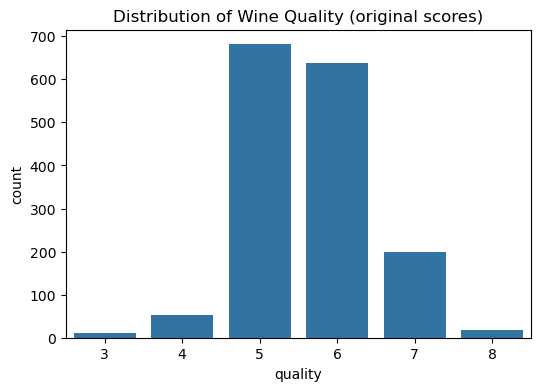

Counts (good=1):
quality_label
0    1382
1     217
Name: count, dtype: int64


<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [115]:
# Basic stats
display(df.describe())

# Distribution of quality
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality (original scores)')
plt.show()

# Binary target for classification
df['quality_label'] = (df['quality'] >= 7).astype(int)  # 1 -> good, 0 -> not good
print('Counts (good=1):')
print(df['quality_label'].value_counts())
df['quality'].unique


In [116]:
X = df.drop(columns=['quality','quality_label'])
y_clf = df['quality_label']
y_reg = df['quality']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.25, random_state=42, stratify=y_clf)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.25, random_state=42)

print('Classification train size:', X_train_clf.shape)
print('Regression train size:', X_train_reg.shape)

Classification train size: (1199, 11)
Regression train size: (1199, 11)


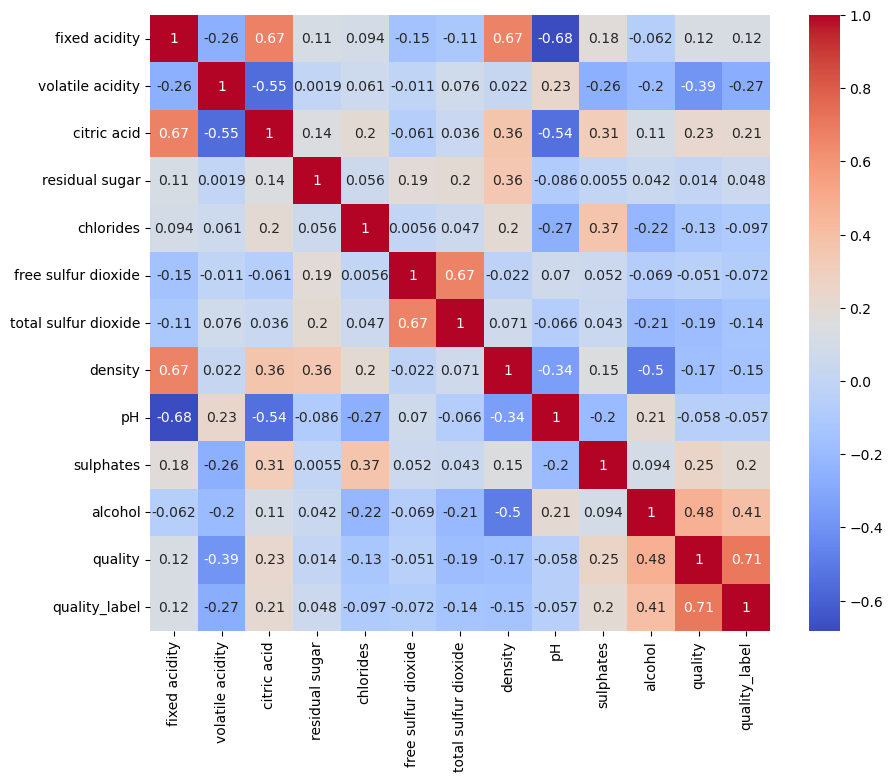

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [118]:
from sklearn.preprocessing import StandardScaler

X = df  # toutes les colonnes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 1, Inertie = 20787.00
k = 2, Inertie = 17174.29
k = 3, Inertie = 15404.32
k = 4, Inertie = 13552.47
k = 5, Inertie = 12605.23
k = 6, Inertie = 12114.15
k = 7, Inertie = 11553.54
k = 8, Inertie = 10038.10
k = 9, Inertie = 9701.56
k = 10, Inertie = 9421.64


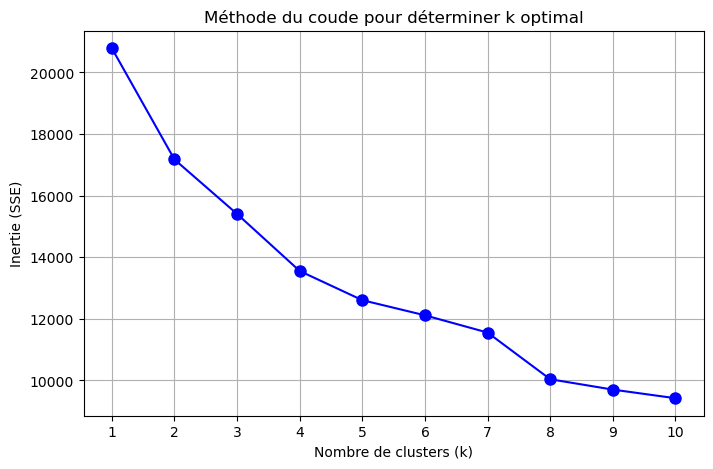

In [120]:
# Méthode du coude
from sklearn.cluster import KMeans
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Affichage des valeurs de k et de l'inertie
for k_val, inertia_val in zip(K, inertia):
    print(f"k = {k_val}, Inertie = {inertia_val:.2f}")

# Tracé du graphique
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (SSE)')
plt.title('Méthode du coude pour déterminer k optimal')
plt.xticks(K)
plt.grid(True)
plt.show()

Analyse de la méthode du coude

L’inertie diminue fortement de k=1 à k=4.

Après k=5, la baisse devient plus progressive, donc le “coude” se situe probablement autour de k = 4 ou 5.

Cela confirme que 5 clusters est un choix raisonnable pour ton dataset.

In [122]:
# KMeans avec 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X_scaled)

# Ajouter les labels au dataframe
df['cluster_5'] = kmeans_5.labels_

# Afficher la taille de chaque cluster
cluster_counts = df['cluster_5'].value_counts()
print(cluster_counts)

# Moyennes des variables par cluster pour interprétation
cluster_means = df.groupby('cluster_5').mean()
print(cluster_means)

cluster_5
0    523
3    313
2    299
1    275
4    189
Name: count, dtype: int64
           fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_5                                                                 
0               7.569025          0.644627     0.126750        2.225908   
1               6.864727          0.499473     0.189600        2.154182   
2               8.209699          0.547207     0.292140        3.304013   
3              10.506070          0.423978     0.485335        2.574760   
4               9.066667          0.387143     0.400000        2.694180   

           chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster_5                                                                   
0           0.084029            11.234226             34.384321  0.996695   
1           0.069040            19.736364             44.785455  0.994514   
2           0.089652            27.297659             94.130435  0.997561   
3       

In [124]:
from sklearn.cluster import KMeans

# KMeans avec 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_scaled)

# Ajouter les labels au dataframe
df['cluster_2'] = kmeans_2.labels_

# Afficher la taille de chaque cluster
cluster_counts_2 = df['cluster_2'].value_counts()
print("Taille de chaque cluster :")
print(cluster_counts_2)

# Moyennes des variables par cluster pour interprétation
cluster_means_2 = df.groupby('cluster_2').mean()
print("\nMoyennes des variables par cluster :")
print(cluster_means_2)


Taille de chaque cluster :
cluster_2
1    1054
0     545
Name: count, dtype: int64

Moyennes des variables par cluster :
           fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_2                                                                 
0               9.897615          0.394853     0.467505        2.759633   
1               7.503700          0.596575     0.169355        2.424620   

           chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster_2                                                                   
0           0.099442            13.172477             36.148624  0.997499   
1           0.081274            17.272296             51.803605  0.996358   

                 pH  sulphates    alcohol   quality  quality_label  cluster_5  
cluster_2                                                                      
0          3.204459   0.760624  10.776453  6.099083       0.317431   3.082569  
1          3.366262   0.60516

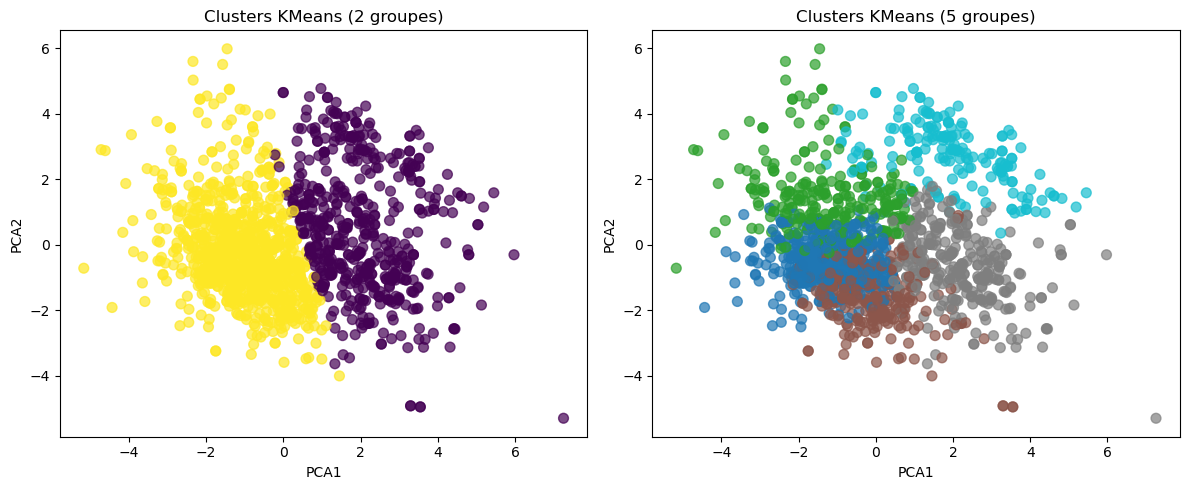

In [127]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire X_scaled à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les composantes PCA au dataframe pour faciliter le tracé
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Tracé pour les clusters à 2 groupes
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_2'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters KMeans (2 groupes)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Tracé pour les clusters à 5 groupes
plt.subplot(1,2,2)
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_5'], cmap='tab10', s=50, alpha=0.7)
plt.title('Clusters KMeans (5 groupes)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()


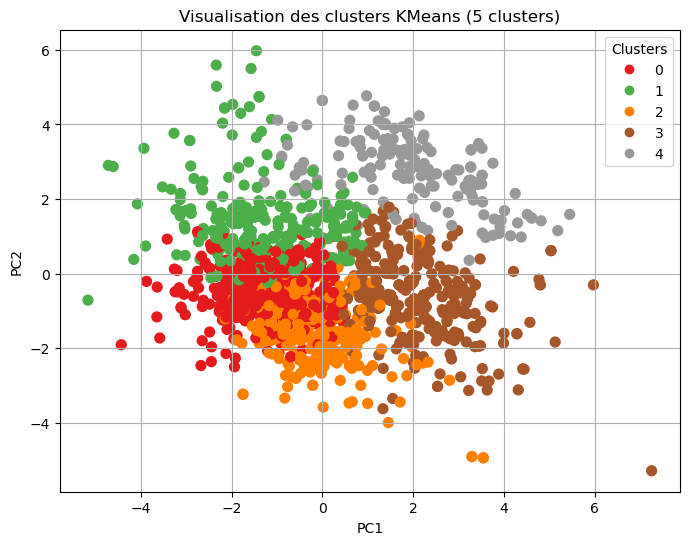

In [130]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster_5'], cmap='Set1', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation des clusters KMeans (5 clusters)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

Taille de chaque cluster (AHC 2 clusters, Manhattan) :
cluster_ahc_2_manhattan
0    1598
1       1
Name: count, dtype: int64

Moyennes des variables par cluster :
                         fixed acidity  volatile acidity  citric acid  \
cluster_ahc_2_manhattan                                                 
0                             8.319086          0.527825     0.270519   
1                             9.200000          0.520000     1.000000   

                         residual sugar  chlorides  free sulfur dioxide  \
cluster_ahc_2_manhattan                                                   
0                              2.538267    0.08714            15.864831   
1                              3.400000    0.61000            32.000000   

                         total sulfur dioxide   density        pH  sulphates  \
cluster_ahc_2_manhattan                                                        
0                                   46.453692  0.996745  3.311471   0.657309   
1  

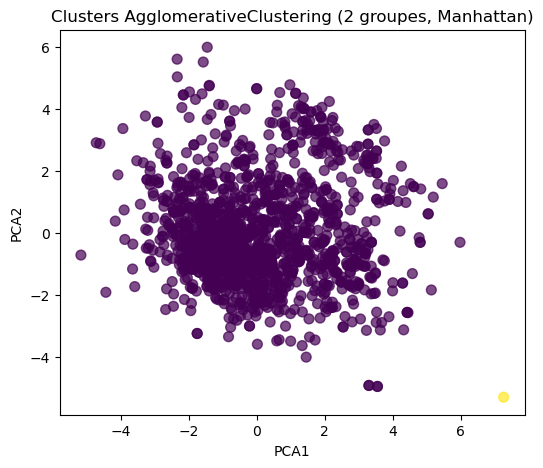

In [134]:
from sklearn.cluster import AgglomerativeClustering

# Clustering hiérarchique avec 2 clusters, distance Manhattan
ahc_2_manhattan = AgglomerativeClustering(
    n_clusters=2,
    metric='manhattan',  # ou metric='manhattan' selon la version
    linkage='complete'
)

df['cluster_ahc_2_manhattan'] = ahc_2_manhattan.fit_predict(X_scaled)

# Afficher la taille de chaque cluster
print("Taille de chaque cluster (AHC 2 clusters, Manhattan) :")
print(df['cluster_ahc_2_manhattan'].value_counts())

# Moyennes des variables par cluster
print("\nMoyennes des variables par cluster :")
print(df.groupby('cluster_ahc_2_manhattan').mean())

# Visualisation PCA
plt.figure(figsize=(6,5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_ahc_2_manhattan'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters AgglomerativeClustering (2 groupes, Manhattan)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


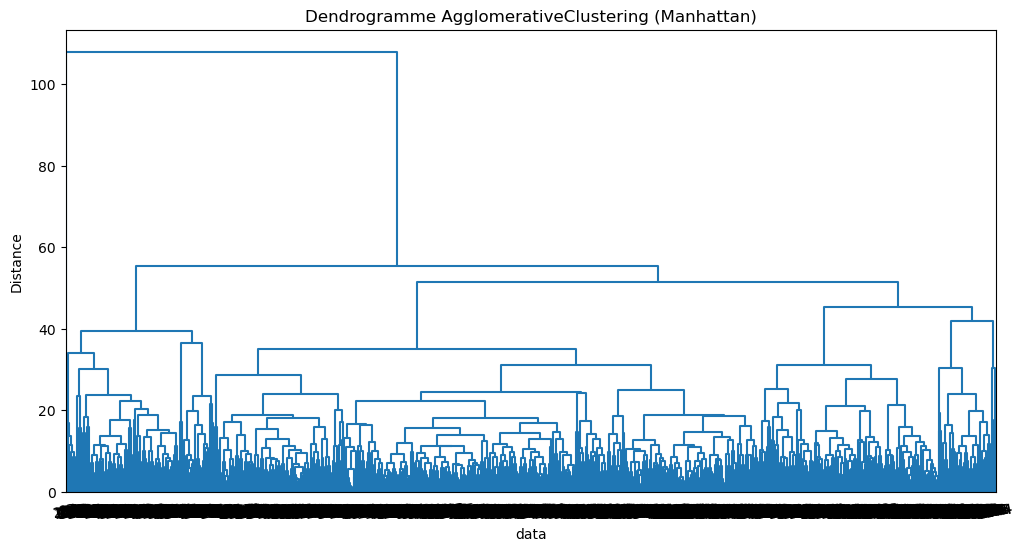

In [135]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Normaliser toutes les variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # utiliser tout le dataframe

# Calcul du linkage hiérarchique avec distance Manhattan et linkage complet
Z = linkage(X_scaled, method='complete', metric='cityblock')  # cityblock = Manhattan

# Tracer le dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, leaf_rotation=10, leaf_font_size=10, color_threshold=0)
plt.title("Dendrogramme AgglomerativeClustering (Manhattan)")
plt.xlabel("data")
plt.ylabel("Distance")
plt.show()


In [141]:
from scipy.cluster.hierarchy import fcluster

# Exemple pour 2 clusters
df['cluster_ahc_2'] = fcluster(Z, t=2, criterion='maxclust') - 1  # labels 0 et 1



# Vérifier la taille des clusters
print("Taille clusters 2 groupes :\n", df['cluster_ahc_2'].value_counts())



Taille clusters 2 groupes :
 cluster_ahc_2
0    1598
1       1
Name: count, dtype: int64


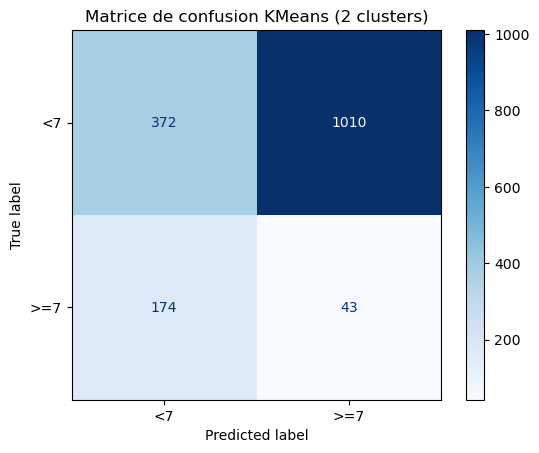

In [196]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# KMeans 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Les labels sont arbitraires : parfois il faut inverser
y_pred_kmeans = df['cluster_kmeans']

# Matrice de confusion
cm_kmeans = confusion_matrix(y, y_pred_kmeans)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=['<7', '>=7'])
disp_kmeans.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion KMeans (2 clusters)")
plt.show()


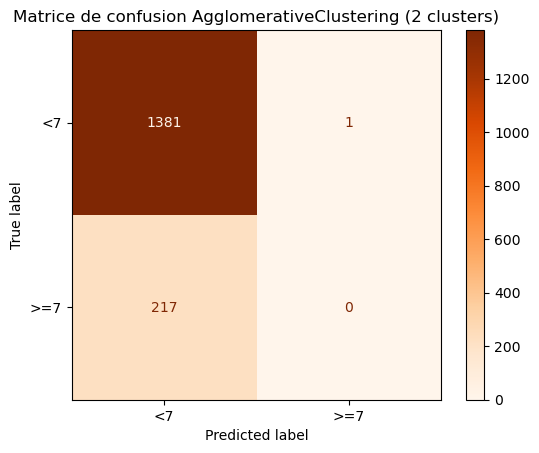

In [198]:
from scipy.cluster.hierarchy import fcluster

# AC 2 clusters
from scipy.cluster.hierarchy import linkage
Z = linkage(X_scaled, method='complete', metric='cityblock')
df['cluster_ac'] = fcluster(Z, t=2, criterion='maxclust') - 1  # labels 0 et 1

# Matrice de confusion
y_pred_ac = df['cluster_ac']
cm_ac = confusion_matrix(y, y_pred_ac)
disp_ac = ConfusionMatrixDisplay(confusion_matrix=cm_ac, display_labels=['<7', '>=7'])
disp_ac.plot(cmap=plt.cm.Oranges)
plt.title("Matrice de confusion AgglomerativeClustering (2 clusters)")
plt.show()


Interprétation des clusters

Cluster 0 (523 vins)

Acidité modérée, sucre faible, alcool moyen (~9.88)

Qualité moyenne ~5.2

Peut être considéré comme un groupe de vins “standards” ou légers.

Cluster 1 (275 vins)

Acidité plus faible, alcool élevé (~11.6), qualité moyenne ~5.9

Vins plus alcoolisés et légèrement mieux notés.

Cluster 2 (299 vins)

Acidité plus élevée, sucre plus important, alcool faible (~9.73)

Qualité ~5.2

Vins plus acides et sucrés.

Cluster 3 (313 vins)

Très forte acidité (10.5), alcool moyen (~10.36), qualité ~5.6

Vins très acides, probablement plus complexes.

Cluster 4 (189 vins)

Acidité élevée (~9), alcool élevé (~11.4), qualité la plus élevée ~7.08

Vins haut de gamme, alcool et qualité élevés, sulfates élevés également

on a :

Modèle global : utilise toutes les variables descriptives comme prédicteurs.

Modèle réduit : utilise uniquement les variables les plus pertinentes.

In [201]:
print(df.isnull().sum())

# Vérifier les types de colonnes
print(df.dtypes)

fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
quality_label              0
cluster_5                  0
cluster_2                  0
PCA1                       0
PCA2                       0
cluster_ahc_2_manhattan    0
cluster_ahc_2              0
cluster_kmeans             0
cluster_ac                 0
dtype: int64
fixed acidity              float64
volatile acidity           float64
citric acid                float64
residual sugar             float64
chlorides                  float64
free sulfur dioxide        float64
total sulfur dioxide       float64
density                    float64
pH                         float64
sulphates                  float64
alcohol                    f

In [203]:
X = df.drop(['quality','cluster_5'], axis=1)
y = df['quality']

In [210]:
#Modeling



In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Variables descriptives
X_global = X_scaled  # toutes les colonnes sauf 'quality' et 'cluster_5'
y = df['quality']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_global, y, test_size=0.2, random_state=42
)

# Création et entraînement du modèle global
rf_global = RandomForestClassifier(n_estimators=200, random_state=42)
rf_global.fit(X_train, y_train)

# Prédictions
y_pred_global = rf_global.predict(X_test)

# Évaluation
print("=== Modèle Global ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_global))
print("\nClassification Report:\n", classification_report(y_test, y_pred_global))


=== Modèle Global ===
Confusion Matrix:
 [[  0   1   0   0   0   0]
 [  0   9   1   0   0   0]
 [  0   0 130   0   0   0]
 [  0   0   0 132   0   0]
 [  0   0   0   0  42   0]
 [  0   0   0   0   2   3]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.90      0.90      0.90        10
           5       0.99      1.00      1.00       130
           6       1.00      1.00      1.00       132
           7       0.95      1.00      0.98        42
           8       1.00      0.60      0.75         5

    accuracy                           0.99       320
   macro avg       0.81      0.75      0.77       320
weighted avg       0.98      0.99      0.99       320



In [213]:
print(X_scaled.shape)  # devrais être (1599, 13)
print(df.drop(['cluster_5'], axis=1).columns)  # voir quelles colonnes sont incluses


(1599, 20)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'cluster_2',
       'PCA1', 'PCA2', 'cluster_ahc_2_manhattan', 'cluster_ahc_2',
       'cluster_kmeans', 'cluster_ac'],
      dtype='object')


In [214]:
feature_columns = list(df.drop(['cluster_5'], axis=1).columns)  # correspond à X_scaled
feature_importances = pd.Series(rf_global.feature_importances_, index=feature_columns).sort_values(ascending=False)


In [215]:
top_features = [col for col in feature_importances.index[:5] if col != 'quality']
print("Top 5 variables pour le modèle réduit :", top_features)


Top 5 variables pour le modèle réduit : ['PCA2', 'quality_label', 'alcohol', 'PCA1']


In [220]:
cols_indices = [feature_columns.index(col) for col in top_features]
X_reduced = X_scaled[:, cols_indices]


In [222]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


In [224]:
from sklearn.ensemble import RandomForestClassifier

rf_reduced = RandomForestClassifier(n_estimators=200, random_state=42)
rf_reduced.fit(X_train_r, y_train_r)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [225]:
y_pred_reduced = rf_reduced.predict(X_test_r)


In [227]:
#evaluation

In [228]:
from sklearn.metrics import confusion_matrix, classification_report

print("=== Modèle Réduit ===")
print("Confusion Matrix:\n", confusion_matrix(y_test_r, y_pred_reduced))
print("\nClassification Report:\n", classification_report(y_test_r, y_pred_reduced))


=== Modèle Réduit ===
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  1   4   5   0   0   0]
 [  0   0 114  16   0   0]
 [  0   0  23 109   0   0]
 [  0   0   0   0  42   0]
 [  0   0   0   0   5   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.40      0.57        10
           5       0.80      0.88      0.84       130
           6       0.87      0.83      0.85       132
           7       0.89      1.00      0.94        42
           8       0.00      0.00      0.00         5

    accuracy                           0.84       320
   macro avg       0.59      0.52      0.53       320
weighted avg       0.83      0.84      0.83       320



Le modèle global est très performant mais utilise toutes les variables.

Le modèle réduit est plus simple, mais perd de la précision, surtout sur les classes minoritaires

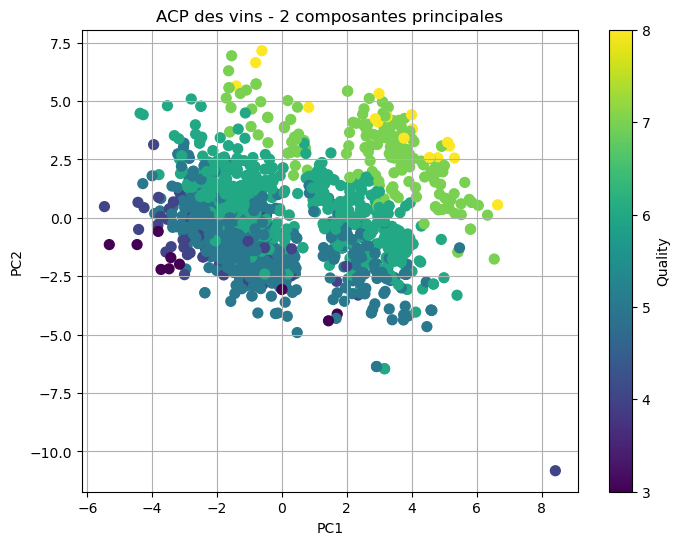

In [180]:
#ACP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Créer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled = données normalisées

# Pour visualiser en 2D
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['quality'], cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP des vins - 2 composantes principales')
plt.colorbar(scatter, label='Quality')
plt.grid(True)
plt.show()


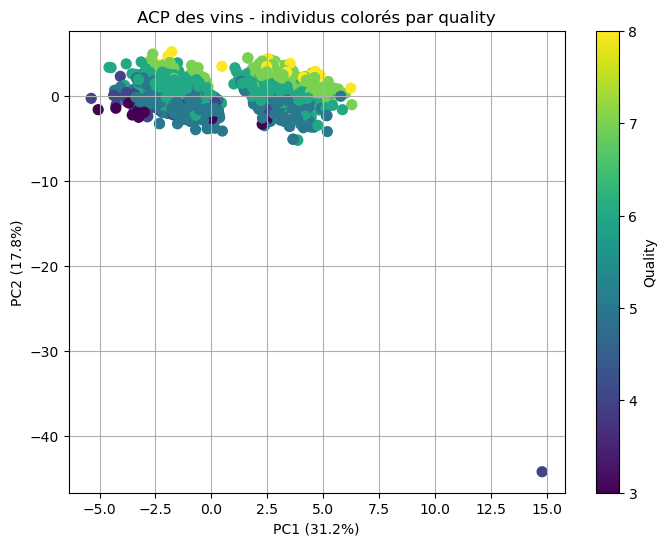

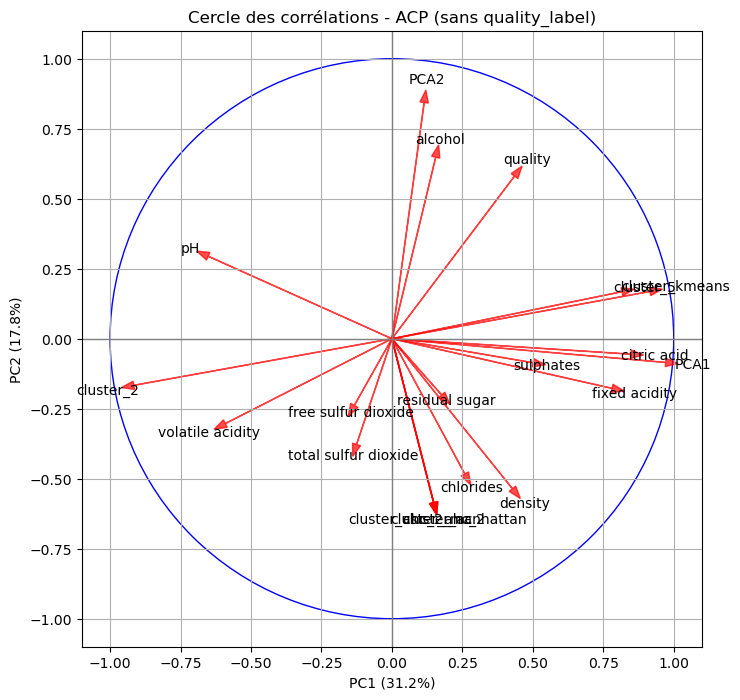

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ==============================
# Données
# ==============================
# On retire 'quality_label' seulement
X = df.drop(columns=['quality_label'])
y = df['quality']  # pour colorer les points

# Normalisation
X_scaled = StandardScaler().fit_transform(X)

# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ==============================
# Graphique 1 : projection des individus (colorés par quality)
# ==============================
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('ACP des vins - individus colorés par quality')
plt.colorbar(scatter, label='Quality')
plt.grid(True)
plt.show()

# ==============================
# Graphique 2 : cercle des corrélations
# ==============================
# Corrélations entre variables et composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8,8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle unité
circle = plt.Circle((0,0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Flèches et noms des variables
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color='red', alpha=0.7, head_width=0.03)
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, var,
             color='black', ha='center', va='center')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Cercle des corrélations - ACP (sans quality_label)')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.show()


In [184]:
import pandas as pd
import numpy as np

# Loadings = corrélation entre les variables et les axes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# DataFrame des corrélations
corr_df = pd.DataFrame(loadings, index=X.columns, columns=['PC1', 'PC2'])

# Contribution absolue (pour identifier les plus fortes influences)
corr_df['PC1_abs'] = corr_df['PC1'].abs()
corr_df['PC2_abs'] = corr_df['PC2'].abs()

# Trier les variables selon leur contribution à PC1 et PC2
causes_PC1 = corr_df.sort_values(by='PC1_abs', ascending=False)
causes_PC2 = corr_df.sort_values(by='PC2_abs', ascending=False)

print("=== Variables expliquant le plus la déviation selon PC1 ===")
print(causes_PC1[['PC1', 'PC1_abs']])
print("\n=== Variables expliquant le plus la déviation selon PC2 ===")
print(causes_PC2[['PC2', 'PC2_abs']])


=== Variables expliquant le plus la déviation selon PC1 ===
                              PC1   PC1_abs
PCA1                     0.971218  0.971218
cluster_2               -0.915736  0.915736
cluster_kmeans           0.915580  0.915580
citric acid              0.848319  0.848319
cluster_5                0.816268  0.816268
fixed acidity            0.781190  0.781190
pH                      -0.651604  0.651604
volatile acidity        -0.590922  0.590922
sulphates                0.500682  0.500682
quality                  0.434979  0.434979
density                  0.427776  0.427776
chlorides                0.258735  0.258735
residual sugar           0.176549  0.176549
alcohol                  0.155454  0.155454
cluster_ahc_2_manhattan  0.148131  0.148131
cluster_ahc_2            0.148131  0.148131
cluster_ac               0.148131  0.148131
free sulfur dioxide     -0.133316  0.133316
total sulfur dioxide    -0.125306  0.125306
PCA2                     0.114466  0.114466

=== Variables e

RMSE : 0.708
R² : 0.210


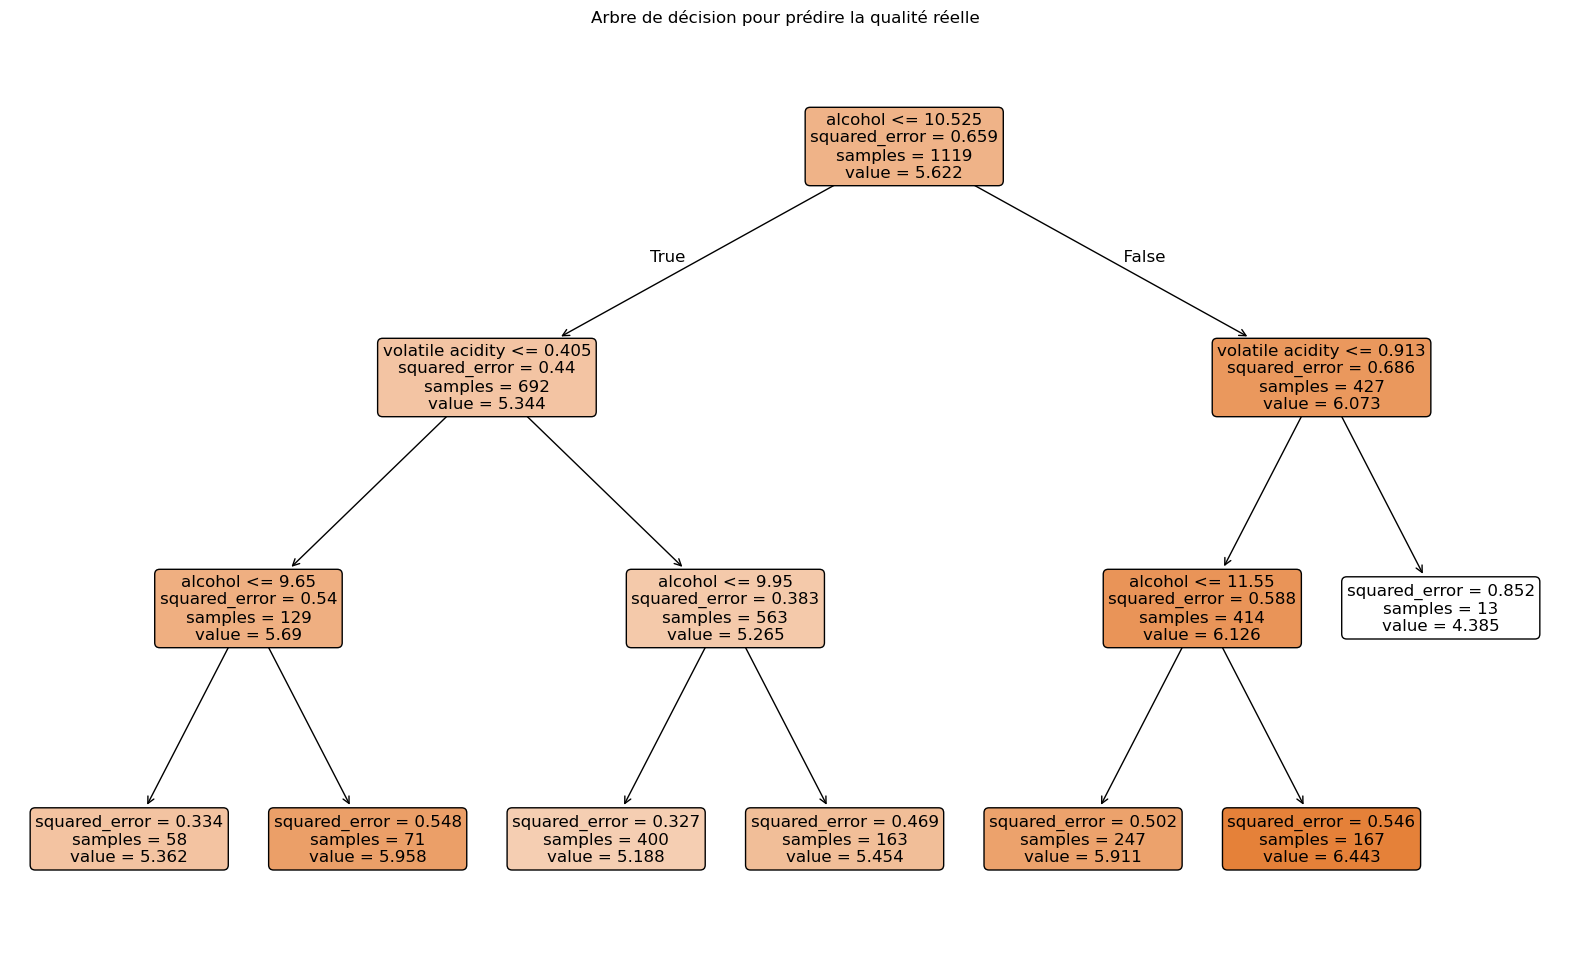

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ==============================
# 1️⃣ Variables explicatives
# ==============================
features = ['alcohol', 'pH', 'volatile acidity']
X = df[features]

# ==============================
# 2️⃣ Variable cible = quality (valeurs réelles)
# ==============================
y = df['quality']

# ==============================
# 3️⃣ Train/Test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ==============================
# 4️⃣ Arbre de décision (régression)
# ==============================
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)
tree.fit(X_train, y_train)

# ==============================
# 5️⃣ Évaluation
# ==============================
y_pred = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.3f}")
print(f"R² : {r2:.3f}")

# ==============================
# 6️⃣ Visualisation de l’arbre
# ==============================
plt.figure(figsize=(20,12))
plot_tree(tree, 
          feature_names=features, 
          filled=True, rounded=True, fontsize=12)
plt.title("Arbre de décision pour prédire la qualité réelle")
plt.show()


In [256]:

from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
tree.fit(X_train, y_train)

def arbre_en_regles(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    rules = []

    def recurse(node, rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            # Split interne
            name = feature_name[node]
            threshold = tree_.threshold[node]
            
            # Branche gauche
            recurse(tree_.children_left[node], rule + [f"{name} <= {threshold:.3f}"])
            # Branche droite
            recurse(tree_.children_right[node], rule + [f"{name} > {threshold:.3f}"])
        else:
            # Feuille → classe prédite
            value = tree_.value[node]
            class_idx = value.argmax()
            rules.append((" AND ".join(rule), class_names[class_idx]))

    recurse(0, [])
    return rules

# ==============================
# Variables
# ==============================
features = ['alcohol', 'pH', 'volatile acidity']
class_names = tree.classes_

# ==============================


✅ RMSE : 0.520
✅ R² : 0.573


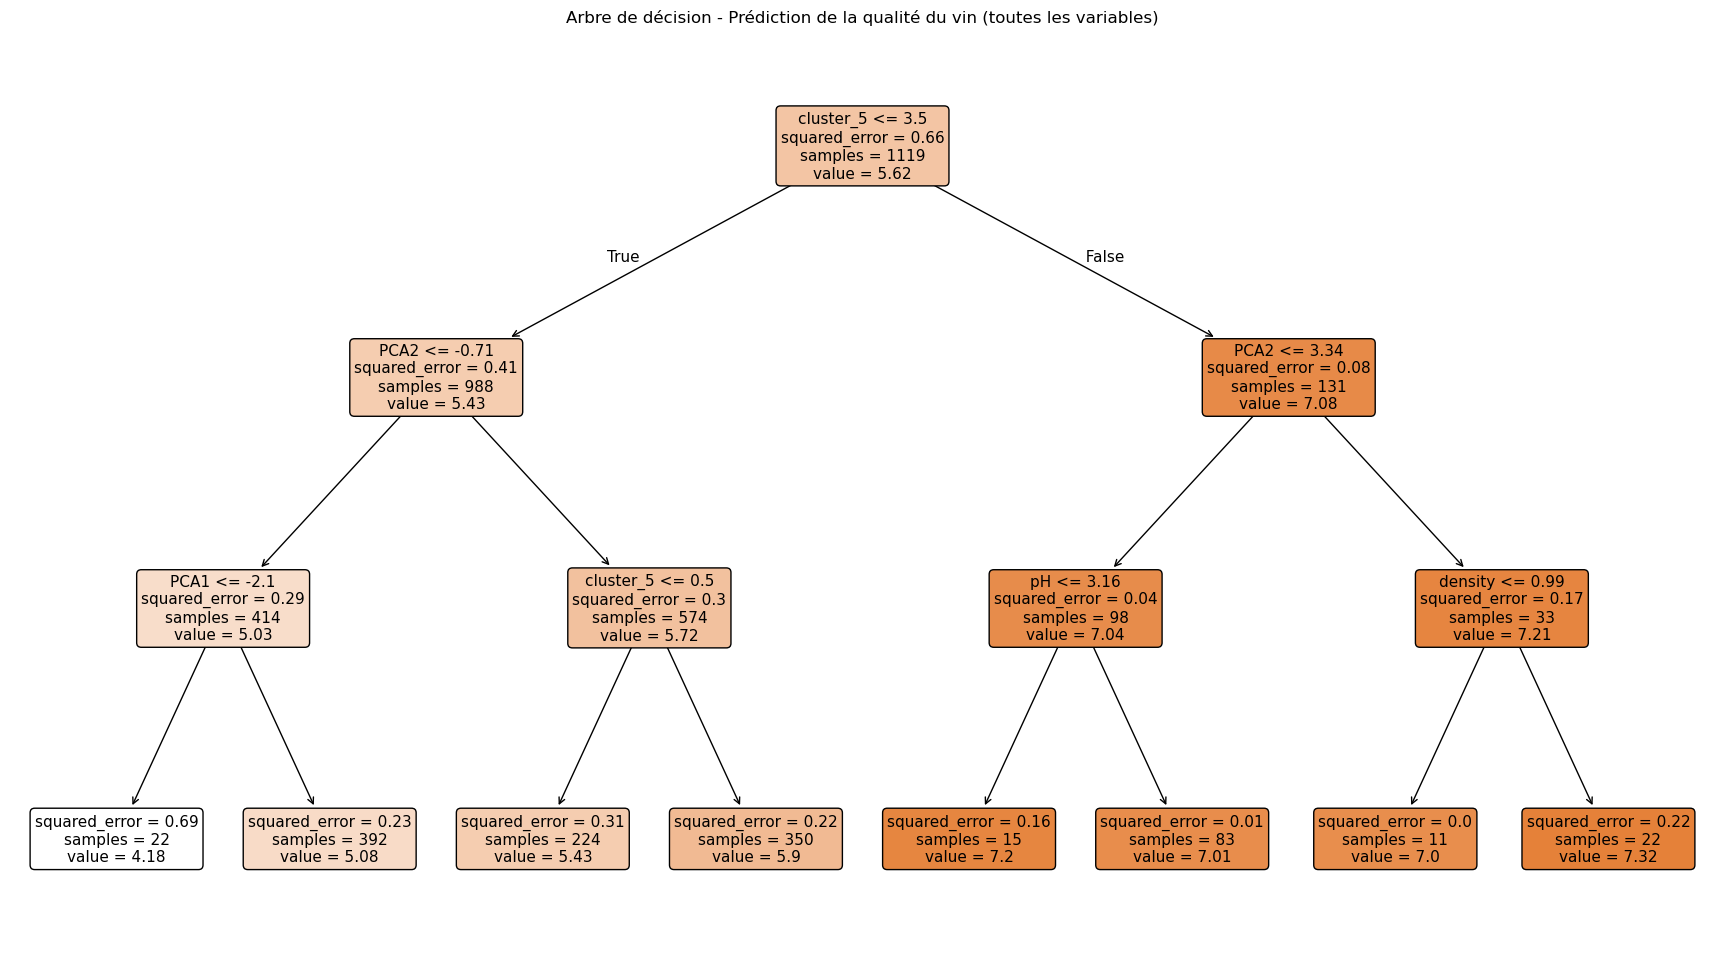

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ==============================
# 1️⃣ Variables explicatives = toutes sauf 'quality' et 'quality_label'
# ==============================
features = [col for col in df.columns if col not in ['quality', 'quality_label']]
X = df[features]

# ==============================
# 2️⃣ Variable cible = quality réelle
# ==============================
y = df['quality']

# ==============================
# 3️⃣ Train/Test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ==============================
# 4️⃣ Arbre de décision (régression)
# ==============================
tree = DecisionTreeRegressor(
    max_depth=3,          # profondeur modérée pour lisibilité
    min_samples_leaf=10,  # chaque feuille a au moins 10 échantillons
    random_state=42
)
tree.fit(X_train, y_train)

# ==============================
# 5️⃣ Évaluation du modèle
# ==============================
y_pred = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse:.3f}")
print(f"✅ R² : {r2:.3f}")

# ==============================
# 6️⃣ Visualisation de l’arbre
# ==============================
plt.figure(figsize=(22,12))
plot_tree(
    tree,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=11,
    precision=2
)
plt.title("Arbre de décision - Prédiction de la qualité du vin (toutes les variables)")
plt.show()


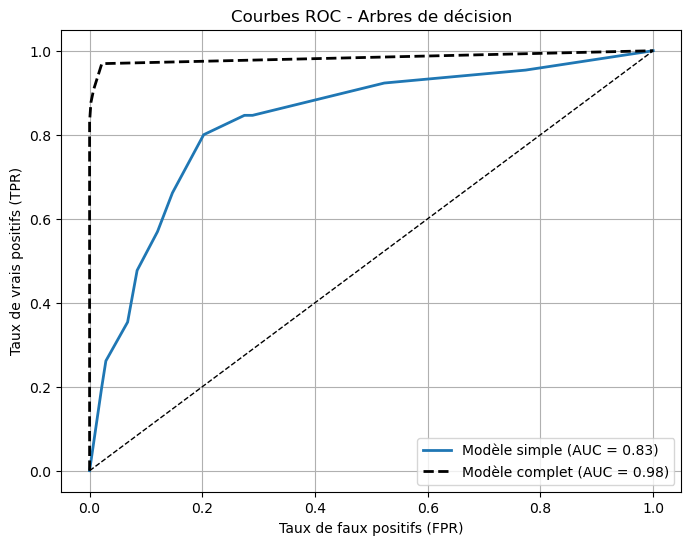

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

# ==============================
# 1️⃣ Préparation des données
# ==============================
# Variable cible binaire : 1 si quality >= 7, sinon 0
y = (df['quality'] >= 7).astype(int)

# Jeux de variables
features_simple = ['alcohol', 'pH', 'volatile acidity']
features_all = [col for col in df.columns if col not in ['quality', 'quality_label']]

X_simple = df[features_simple]
X_all = df[features_all]

# Séparation train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.3, random_state=42, stratify=y
)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_all, y, test_size=0.3, random_state=42, stratify=y
)

# ==============================
# 2️⃣ Normalisation (Min-Max)
# ==============================
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)
X_train_a = scaler.fit_transform(X_train_a)
X_test_a = scaler.transform(X_test_a)

# ==============================
# 3️⃣ Modèles de décision
# ==============================
tree_simple = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
tree_all = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

tree_simple.fit(X_train_s, y_train_s)
tree_all.fit(X_train_a, y_train_a)

# ==============================
# 4️⃣ Prédictions & ROC
# ==============================
y_score_simple = tree_simple.predict_proba(X_test_s)[:, 1]
y_score_all = tree_all.predict_proba(X_test_a)[:, 1]

fpr_s, tpr_s, _ = roc_curve(y_test_s, y_score_simple)
fpr_a, tpr_a, _ = roc_curve(y_test_a, y_score_all)

auc_s = auc(fpr_s, tpr_s)
auc_a = auc(fpr_a, tpr_a)

# ==============================
# 5️⃣ Affichage des courbes ROC
# ==============================
plt.figure(figsize=(8,6))
plt.plot(fpr_s, tpr_s, lw=2, label=f'Modèle simple (AUC = {auc_s:.2f})')
plt.plot(fpr_a, tpr_a, lw=2, linestyle='--', color='black', label=f'Modèle complet (AUC = {auc_a:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title("Courbes ROC - Arbres de décision")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



interpretation de la courbe rock

on remarque que les deux modele on converger cad il consomer la total
les deux modele sont au au-dessus de la droite du lift
on remarque que modele complet proche de la trp donc il est mieux que le modele simple
on constate que le modele simple a comme AUC= 0.83 et le modele complet a comme AUC=0.8


k-means
condition d arret complete :
distance intraclass
distance interclass
and the cluster remains the same
on parle alors d une inertie interne (grande) et externe (petite)